In [1]:
# 1 Inicio
# 1.1 Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score
import math
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# 1.2 Abrir los archivos CSV
Messi = pd.read_csv(r"C:\Users\Flor Guindo\Documents\CURSO DATA ANALYTICS\archive (1)\messi.csv")

# 1.3 Mostrar las primeras filas de los DataFrames
print("\n\033[1m\033[95mPARTE 1: Visualizar datos\033[0m")
print("Messi head:")
display(Messi.head())


PARTE 1: Visualizar datos
Messi head:


,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,2ª B - Grupo III,2,9/5/04,Home,FC Barcelona B,Girona FC,1:2,LW,65',1:2,Left-footed shot,Dani Fernández
1,2ª B - Grupo III,4,9/18/04,Home,FC Barcelona B,RCD Espanyol B,2:0,LW,88',2:0,Left-footed shot,Dani Fernández
2,2ª B - Grupo III,10,10/31/04,Away,FC Barcelona B,Villajoyosa CF,2:1,AM,2',0:1,Not reported,Not Applicable
3,2ª B - Grupo III,14,11/28/04,Away,FC Barcelona B,UE Figueres,2:2,AM,20',0:1,Not reported,Not Applicable
4,2ª B - Grupo III,17,12/19/04,Home,FC Barcelona B,CD Alcoyano,2:0,CF,40',2:0,Left-footed shot,Not Applicable


In [3]:
Messi['Date'].value_counts()

Date
3/7/12      5
9/19/17     4
2/22/20     4
5/5/12      4
4/6/10      4
           ..
10/22/13    1
9/28/13     1
9/24/13     1
9/14/13     1
11/10/24    1
Name: count, Length: 488, dtype: int64

In [4]:
# 2. Información de los DataFrames
# 2.1 Mostrar información de los tipos de datos
print("\n\033[1m\033[95mPARTE 2: Descripción estadística\033[0m")
print("Info Messi:")
print(Messi.info())
print("----------------------------------------------------------")
# 2.2 Mostrar descripción estadística
print("Descripción estadística goles Messi:")
display(Messi.describe())
print("----------------------------------------------------------")


PARTE 2: Descripción estadística
Info Messi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tournament   744 non-null    object
 1   Matchday     744 non-null    object
 2   Date         744 non-null    object
 3   Venue        744 non-null    object
 4   Club         744 non-null    object
 5   Opponent     744 non-null    object
 6   Result       744 non-null    object
 7   Position     744 non-null    object
 8   Minute       744 non-null    object
 9   When Scored  744 non-null    object
 10  Goal Type    744 non-null    object
 11  Assist       744 non-null    object
dtypes: object(12)
memory usage: 69.9+ KB
None
----------------------------------------------------------
Descripción estadística goles Messi:


,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
count,744,744,744,744,744,744,744,744,744,744,744,744
unique,13,45,488,2,4,116,49,6,99,39,13,80
top,LaLiga,Gruppenphase,3/7/12,Home,FC Barcelona,Sevilla FC,4:0,RW,45',1:0,Left-footed shot,Not Applicable
freq,474,83,5,445,672,38,49,345,14,102,459,226


----------------------------------------------------------


In [5]:
# 3. Limpiar fechas para agrupar por temporada
fecha = ['Date']
for col in fecha:
    Messi[col] = pd.to_datetime(Messi['Date'], dayfirst=False, errors='coerce').dt.normalize()

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_22872\1999217756.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Messi[col] = pd.to_datetime(Messi['Date'], dayfirst=False, errors='coerce').dt.normalize()


In [6]:
# 4.Convertir minutos a enteros
minutos = ['Minute']
def limpiar_minutos(valor):
    if isinstance(valor, str):
        valor = valor.replace("'", "")
        if '+' in valor:
            partes = valor.split('+')
            try:
                return int(partes[0]) + int(partes[1])
            except ValueError:
                return None
        try:
            return int(valor) 
        except ValueError:
            return None
    return None
for col in minutos:
    Messi[col] = Messi[col].apply(limpiar_minutos)

In [7]:
# 5. Definir temporadas
def obtener_temporada(fecha):
    if fecha.month >= 7:  
        return f"{fecha.year}/{fecha.year + 1}"
    else:  
        return f"{fecha.year - 1}/{fecha.year}"
Messi['Season'] = Messi['Date'].apply(obtener_temporada)

In [8]:
#6. Agrupar por temporada
goles_por_temporada_messi = Messi.groupby('Season').size().reset_index(name='Goles')
print("Goles por temporada - Messi:")
display(goles_por_temporada_messi)

Goles por temporada - Messi:


,Season,Goles
0,2004/2005,7
1,2005/2006,8
2,2006/2007,17
3,2007/2008,16
4,2008/2009,38
5,2009/2010,47
6,2010/2011,53
7,2011/2012,73
8,2012/2013,60
9,2013/2014,41


In [9]:
# 7. Agrupar por partido
goles_por_dia_messi = Messi.groupby('Date').size().reset_index(name='Cant_Goles')
goles_por_dia_messi 

,Date,Cant_Goles
0,2004-09-05,1
1,2004-09-18,1
2,2004-10-31,1
3,2004-11-28,1
4,2004-12-19,1
...,...,...
483,2024-09-15,2
484,2024-09-29,1
485,2024-10-03,2
486,2024-10-20,3


In [10]:
# 8. Filtramos las columnas con las que queremos realizar el analisis
Messi_base = Messi[['Club', 'Date', 'When Scored', 'Matchday', 'Season', 'Minute']]
Messi_base

,Club,Date,When Scored,Matchday,Season,Minute
0,FC Barcelona B,2004-09-05,1:2,2,2004/2005,65
1,FC Barcelona B,2004-09-18,2:0,4,2004/2005,88
2,FC Barcelona B,2004-10-31,0:1,10,2004/2005,2
3,FC Barcelona B,2004-11-28,0:1,14,2004/2005,20
4,FC Barcelona B,2004-12-19,2:0,17,2004/2005,40
...,...,...,...,...,...,...
739,Inter Miami CF,2024-10-03,0:1,35,2024/2025,45
740,Inter Miami CF,2024-10-20,4:2,37,2024/2025,78
741,Inter Miami CF,2024-10-20,5:2,37,2024/2025,81
742,Inter Miami CF,2024-10-20,6:2,37,2024/2025,89


In [11]:
# 9. Agrupamos las fechas por partido y sumamos la cantidad de goles
Messi_limpio = pd.merge(goles_por_dia_messi, Messi_base[['Club', 'Date', 'When Scored', 'Matchday','Season']], on='Date', how='left')
Messi_limpio = Messi_limpio.drop_duplicates(subset='Date', keep='first')
Messi_limpio

,Date,Cant_Goles,Club,When Scored,Matchday,Season
0,2004-09-05,1,FC Barcelona B,1:2,2,2004/2005
1,2004-09-18,1,FC Barcelona B,2:0,4,2004/2005
2,2004-10-31,1,FC Barcelona B,0:1,10,2004/2005
3,2004-11-28,1,FC Barcelona B,0:1,14,2004/2005
4,2004-12-19,1,FC Barcelona B,2:0,17,2004/2005
...,...,...,...,...,...,...
735,2024-09-15,2,Inter Miami CF,1:1,31,2024/2025
737,2024-09-29,1,Inter Miami CF,1:1,34,2024/2025
738,2024-10-03,2,Inter Miami CF,0:2,35,2024/2025
740,2024-10-20,3,Inter Miami CF,4:2,37,2024/2025


In [12]:
# 10. Calculamos la nueva variable de dias sin marcar
Messi_limpio['dias_sin_marcar'] = Messi_limpio['Date'].diff().dt.days.dropna()
Messi_limpio

,Date,Cant_Goles,Club,When Scored,Matchday,Season,dias_sin_marcar
0,2004-09-05,1,FC Barcelona B,1:2,2,2004/2005,NaN
1,2004-09-18,1,FC Barcelona B,2:0,4,2004/2005,13.0
2,2004-10-31,1,FC Barcelona B,0:1,10,2004/2005,43.0
3,2004-11-28,1,FC Barcelona B,0:1,14,2004/2005,28.0
4,2004-12-19,1,FC Barcelona B,2:0,17,2004/2005,21.0
...,...,...,...,...,...,...,...
735,2024-09-15,2,Inter Miami CF,1:1,31,2024/2025,105.0
737,2024-09-29,1,Inter Miami CF,1:1,34,2024/2025,14.0
738,2024-10-03,2,Inter Miami CF,0:2,35,2024/2025,4.0
740,2024-10-20,3,Inter Miami CF,4:2,37,2024/2025,17.0


In [13]:
# 11. Calculamos el promedio y la suma de goles por temporada segun dias sin marcar
print("Promedio de goles realizados luego de dias sin marcar")
mean_goles_dias_sin_marcar = Messi_limpio.groupby(['dias_sin_marcar', 'Season'])['Cant_Goles'].mean().reset_index()
display(mean_goles_dias_sin_marcar)
print("Suma de goles realizados luego de dias sin marcar")
sum_goles_dias_sin_marcar = Messi_limpio.groupby(['dias_sin_marcar', 'Season'])['Cant_Goles'].sum().reset_index()
display(sum_goles_dias_sin_marcar)

Promedio de goles realizados luego de dias sin marcar


,dias_sin_marcar,Season,Cant_Goles
0,3.0,2005/2006,1.000000
1,3.0,2007/2008,1.250000
2,3.0,2008/2009,1.200000
3,3.0,2009/2010,2.000000
4,3.0,2010/2011,1.428571
...,...,...,...
247,135.0,2021/2022,1.000000
248,146.0,2006/2007,3.000000
249,183.0,2023/2024,1.000000
250,185.0,2005/2006,1.000000


Suma de goles realizados luego de dias sin marcar


,dias_sin_marcar,Season,Cant_Goles
0,3.0,2005/2006,1
1,3.0,2007/2008,5
2,3.0,2008/2009,6
3,3.0,2009/2010,12
4,3.0,2010/2011,10
...,...,...,...
247,135.0,2021/2022,1
248,146.0,2006/2007,3
249,183.0,2023/2024,1
250,185.0,2005/2006,1


In [14]:
mean_goles_dias_sin_marcar ['dias_sin_marcar'].value_counts()

dias_sin_marcar
3.0      17
7.0      17
4.0      17
6.0      14
8.0      14
14.0     12
17.0     12
5.0      11
10.0     11
15.0     11
13.0     10
11.0      9
18.0      7
21.0      6
20.0      5
25.0      5
24.0      5
16.0      5
28.0      4
32.0      4
19.0      3
9.0       3
78.0      3
12.0      3
23.0      3
22.0      3
26.0      2
27.0      2
35.0      2
101.0     2
105.0     2
56.0      2
125.0     1
98.0      1
113.0     1
183.0     1
132.0     1
134.0     1
135.0     1
146.0     1
185.0     1
94.0      1
97.0      1
42.0      1
88.0      1
86.0      1
85.0      1
74.0      1
73.0      1
70.0      1
65.0      1
63.0      1
61.0      1
50.0      1
49.0      1
43.0      1
31.0      1
191.0     1
Name: count, dtype: int64

In [15]:
# 12. Filtramos las diferencias de dias mayores a 25 dias por posibles lesiones
print("Promedio de goles realizados luego de dias sin marcar filtrado")
mean_goles_dias_sin_marcar_filtrados = mean_goles_dias_sin_marcar[mean_goles_dias_sin_marcar['dias_sin_marcar'] < 25]
display(mean_goles_dias_sin_marcar_filtrados)
print("Suma de goles realizados luego de dias sin marcar filtrado")
sum_goles_dias_sin_marcar_filtrados = sum_goles_dias_sin_marcar[sum_goles_dias_sin_marcar['dias_sin_marcar'] < 25]
display(sum_goles_dias_sin_marcar_filtrados)

Promedio de goles realizados luego de dias sin marcar filtrado


,dias_sin_marcar,Season,Cant_Goles
0,3.0,2005/2006,1.000000
1,3.0,2007/2008,1.250000
2,3.0,2008/2009,1.200000
3,3.0,2009/2010,2.000000
4,3.0,2010/2011,1.428571
...,...,...,...
193,24.0,2008/2009,3.000000
194,24.0,2013/2014,1.000000
195,24.0,2016/2017,3.000000
196,24.0,2022/2023,1.000000


Suma de goles realizados luego de dias sin marcar filtrado


,dias_sin_marcar,Season,Cant_Goles
0,3.0,2005/2006,1
1,3.0,2007/2008,5
2,3.0,2008/2009,6
3,3.0,2009/2010,12
4,3.0,2010/2011,10
...,...,...,...
193,24.0,2008/2009,3
194,24.0,2013/2014,1
195,24.0,2016/2017,3
196,24.0,2022/2023,1


,Season,dias_sin_marcar,Cant_Goles
0,2004/2005,8.0,1.0
4,2005/2006,7.0,1.5
7,2006/2007,8.0,2.0
13,2007/2008,4.0,1.5
29,2008/2009,24.0,3.0
39,2009/2010,22.0,3.0
50,2010/2011,17.0,2.0
63,2011/2012,19.0,3.0
75,2012/2013,18.0,2.0
83,2013/2014,14.0,3.0


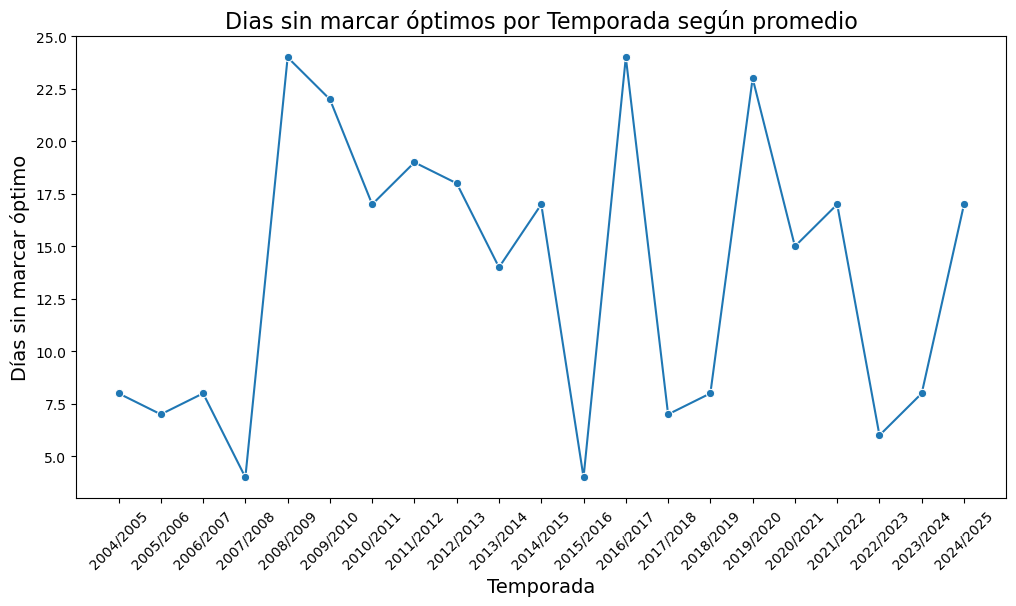

In [16]:
# 13. Calculamos los dias sin marcar optimos por temporada según promedio de goles realizados
descanso_optimo_por_temporada = mean_goles_dias_sin_marcar_filtrados.groupby(['Season', 'dias_sin_marcar'])['Cant_Goles'].mean().reset_index()
descanso_optimo_por_temporada = descanso_optimo_por_temporada.sort_values(by='Cant_Goles', ascending=False).groupby('Season').head(1)
descanso_optimo_por_temporada = descanso_optimo_por_temporada.sort_values(by='Season',ascending=True)
display(descanso_optimo_por_temporada)

plt.figure(figsize=(12, 6))
sns.lineplot(data=descanso_optimo_por_temporada, x='Season',y='dias_sin_marcar',marker='o')
plt.title('Dias sin marcar óptimos por Temporada según promedio', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Días sin marcar óptimo', fontsize=14)
plt.xticks(rotation=45)
plt.show()

,Season,dias_sin_marcar,Cant_Goles
0,2004/2005,8.0,1.0
4,2005/2006,7.0,3.0
10,2006/2007,18.0,4.0
12,2007/2008,3.0,5.0
18,2008/2009,3.0,6.0
30,2009/2010,3.0,12.0
40,2010/2011,3.0,10.0
51,2011/2012,3.0,20.0
65,2012/2013,3.0,16.0
77,2013/2014,4.0,8.0


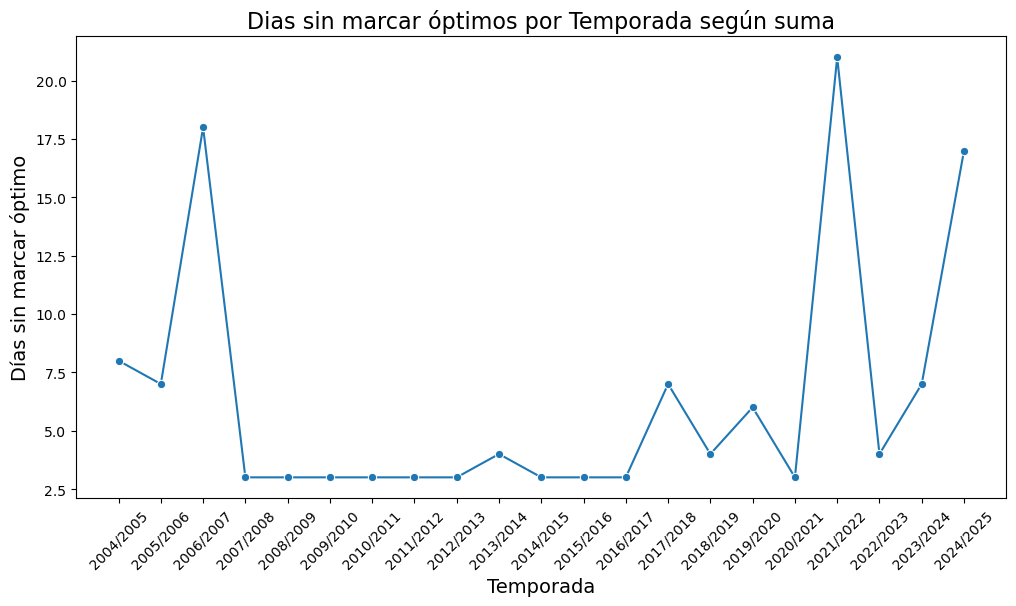

In [17]:
# 14. Calculamos los dias sin marcar optimos por temporada según suma de goles realizados ya que buscamos estabilidad en el rendimiento.
descanso_optimo_por_temporada_sum = sum_goles_dias_sin_marcar_filtrados.groupby(['Season', 'dias_sin_marcar'])['Cant_Goles'].mean().reset_index()
descanso_optimo_por_temporada_sum = descanso_optimo_por_temporada_sum.sort_values(by='Cant_Goles', ascending=False).groupby('Season').head(1)
descanso_optimo_por_temporada_sum = descanso_optimo_por_temporada_sum.sort_values(by='Season',ascending=True)
display(descanso_optimo_por_temporada_sum)
        
plt.figure(figsize=(12, 6))
sns.lineplot(data=descanso_optimo_por_temporada_sum, x='Season',y='dias_sin_marcar',marker='o')
plt.title('Dias sin marcar óptimos por Temporada según suma', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Días sin marcar óptimo', fontsize=14)
plt.xticks(rotation=45)
plt.show()

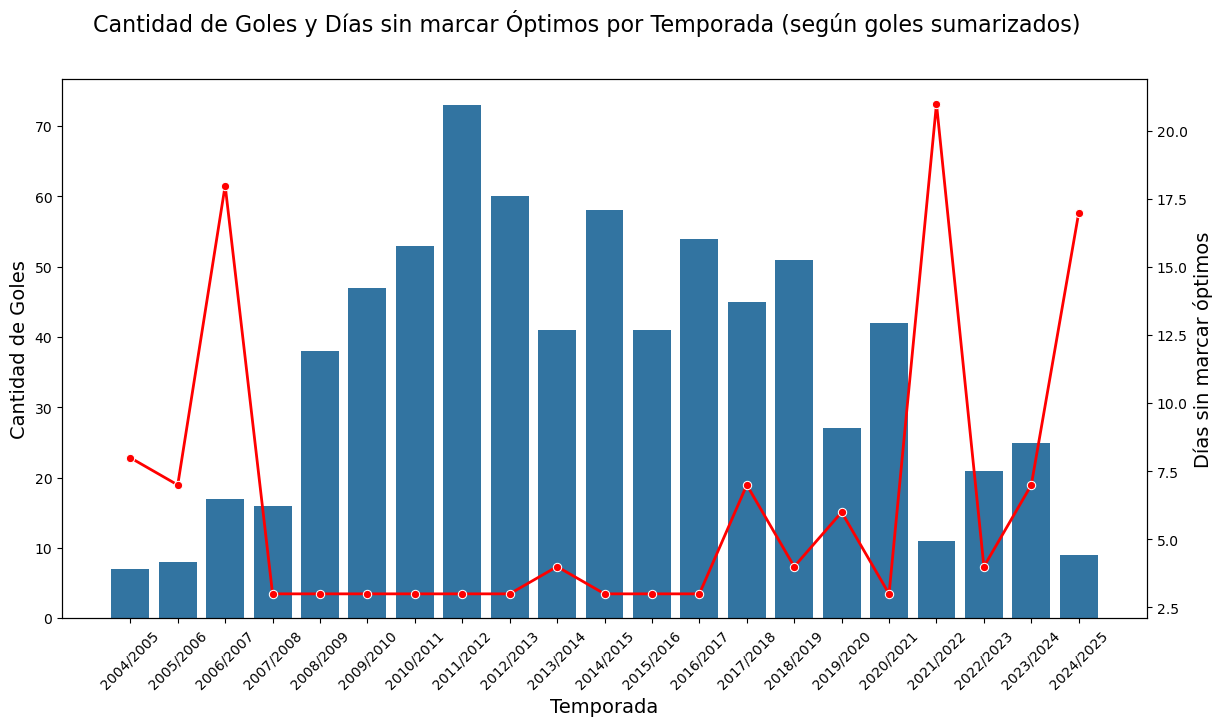

In [18]:
# 15. Comparamos la cantidad total de goles con los dias sin marcar optimos por temporada
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(data=goles_por_temporada_messi, x='Season', y='Goles', ax=ax1)
ax1.set_xlabel('Temporada', fontsize=14)
ax1.set_ylabel('Cantidad de Goles', fontsize=14)
plt.xticks(rotation=45)
ax2 = ax1.twinx()
sns.lineplot(data=descanso_optimo_por_temporada_sum, x='Season',y='dias_sin_marcar', marker='o', color='red', linewidth=2, ax=ax2)
ax2.set_ylabel('Días sin marcar óptimos', fontsize=14)
fig.suptitle('Cantidad de Goles y Días sin marcar Óptimos por Temporada (según goles sumarizados)', fontsize=16)
plt.show()

In [19]:
# 16. Comenzamos la limpieza para el modelado
fases = {
    'Gruppenphase': 'Fase de grupos',
    'Achtelfinale': 'Octavos',
    'Finale': 'Final',
    'Viertelfinale': 'Cuartos',
    'Halbfinale': 'Semifinal',
    '4.Runde': '4',
    '1.Runde': '1'
}

Messi_limpio.Matchday = Messi_limpio.Matchday.apply(lambda x: fases.get(x, x))
Goles_por_instancia = Messi_limpio.groupby(['Matchday'])['Cant_Goles'].sum().reset_index()
Goles_por_instancia

,Matchday,Cant_Goles
0,1,23
1,10,6
2,11,13
3,12,13
4,13,16
5,14,11
6,15,14
7,16,14
8,17,11
9,18,13


In [20]:
fase1 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','1.Runde', '4.Runde']
fase2 = ['20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38']

Goles_por_instancia['Matchday'] = Goles_por_instancia['Matchday'].apply(lambda x: 'fase1' if x in fase1 else ('fase2' if x in fase2 else x))

In [21]:
# 17. Limpiamos variables para poder categorizarlas mas facilmente
Goles_por_instancia_limpio = Goles_por_instancia.groupby(['Matchday'])['Cant_Goles'].sum().reset_index()
Goles_por_instancia_limpio

,Matchday,Cant_Goles
0,Cuartos,24
1,Fase de grupos,83
2,Final,33
3,Octavos,55
4,Semifinal,20
5,fase1,253
6,fase2,276


In [22]:
# 18. Simplificamos aún más
Goles_por_instancia2 = Goles_por_instancia
instancia_final = ['Final', 'Semifinal']
instancia_decisiva_int = ['Cuartos', 'Octavos']
Goles_por_instancia2['Matchday'] = Goles_por_instancia2['Matchday'].apply(lambda x: 'instancia_final' if x in instancia_final else ('instancia_decisiva_int' if x in instancia_decisiva_int else x))
Goles_por_instancia_limpio2 = Goles_por_instancia2
Goles_por_instancia_limpio2['Tipo torneo'] = Goles_por_instancia_limpio2['Matchday'].apply(lambda x: 'Liga' if x == 'fase1' or x == 'fase2' else 'Copa')
Goles_por_instancia_limpio2 = Goles_por_instancia_limpio2.sort_values(by='Tipo torneo', ascending=False)
Goles_por_instancia_limpio2

,Matchday,Cant_Goles,Tipo torneo
0,fase1,23,Liga
29,fase2,9,Liga
22,fase1,16,Liga
23,fase2,10,Liga
24,fase2,16,Liga
25,fase2,8,Liga
26,fase2,11,Liga
27,fase2,18,Liga
28,fase2,15,Liga
30,fase2,17,Liga


In [23]:
# 19. Dividimos entre copa y liga
Goles_por_instancia_copa = Goles_por_instancia_limpio2[Goles_por_instancia_limpio2['Tipo torneo'] == 'Copa']
Goles_por_instancia_copa
Goles_por_instancia_liga = Goles_por_instancia_limpio2[Goles_por_instancia_limpio2['Tipo torneo'] == 'Liga']
Goles_por_instancia_liga

,Matchday,Cant_Goles,Tipo torneo
0,fase1,23,Liga
29,fase2,9,Liga
22,fase1,16,Liga
23,fase2,10,Liga
24,fase2,16,Liga
25,fase2,8,Liga
26,fase2,11,Liga
27,fase2,18,Liga
28,fase2,15,Liga
30,fase2,17,Liga


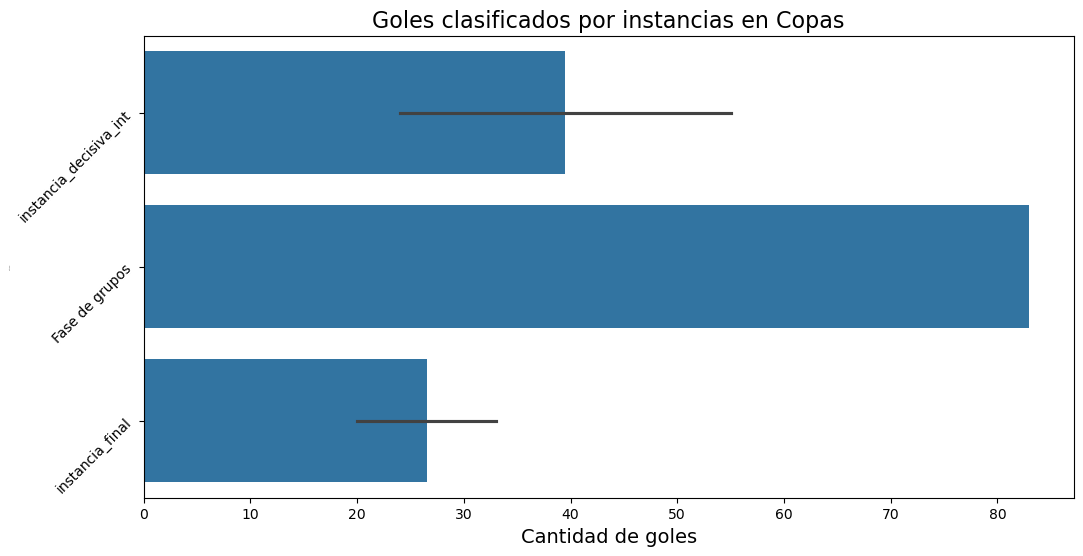

In [24]:
# 20. Vemos los goles según las instancias de las diferentes modalidades de competencia
plt.figure(figsize=(12, 6))
sns.barplot(data=Goles_por_instancia_copa, x='Cant_Goles',y='Matchday')
plt.title('Goles clasificados por instancias en Copas', fontsize=16)
plt.xlabel('Cantidad de goles', fontsize=14)
plt.ylabel('Instancia', fontsize=0)
plt.yticks(rotation=45)
plt.show()

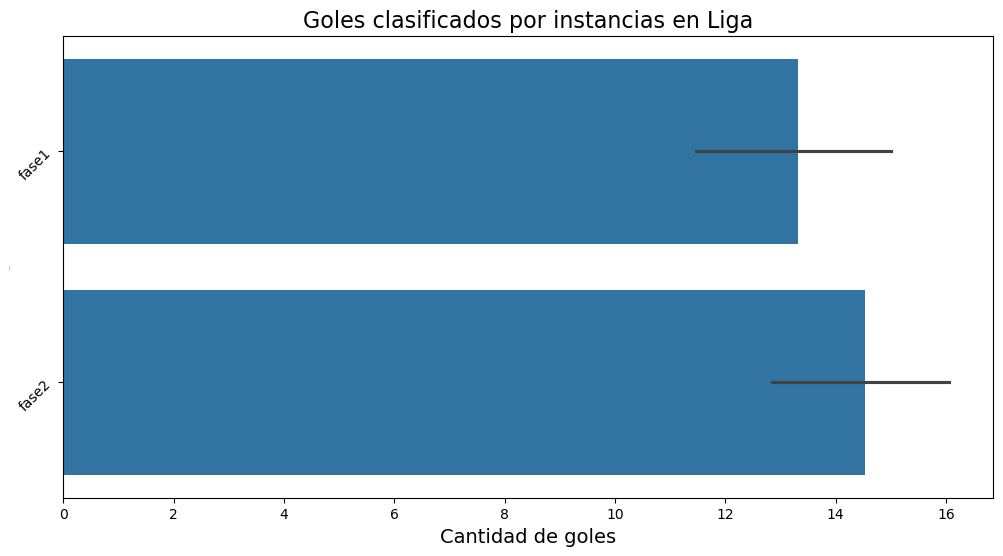

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Goles_por_instancia_liga, x='Cant_Goles',y='Matchday')
plt.title('Goles clasificados por instancias en Liga', fontsize=16)
plt.xlabel('Cantidad de goles', fontsize=14)
plt.ylabel('Instancia', fontsize=0)
plt.yticks(rotation=45)
plt.show()

In [26]:
# 21. Calculamos datos adicionales
Messi_base['Primer_Gol'] = (Messi_base['When Scored'] == '1:0') | (Messi_base['When Scored'] == '0:1')
Primer_gol = Messi_base[Messi_base['Primer_Gol']].shape[0]
Primer_gol

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_22872\2527304758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Messi_base['Primer_Gol'] = (Messi_base['When Scored'] == '1:0') | (Messi_base['When Scored'] == '0:1')


180

In [27]:
Hat_trick = goles_por_dia_messi[goles_por_dia_messi['Cant_Goles'] == 3].shape[0]
Hat_trick

42

In [28]:
# 22. Categorizamos si realizo el gol en el primer, segundo o tiempo extra
Messi_base['Tiempo'] = np.where(Messi_base['Minute'] < 45, 'Primer Tiempo',
                        np.where((Messi_base['Minute'] >= 45) 
                & (Messi_base['Minute'] <= 90), 'Segundo Tiempo',
        'Tiempo Extra'))
Messi_base

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_22872\2739156191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Messi_base['Tiempo'] = np.where(Messi_base['Minute'] < 45, 'Primer Tiempo',


,Club,Date,When Scored,Matchday,Season,Minute,Primer_Gol,Tiempo
0,FC Barcelona B,2004-09-05,1:2,2,2004/2005,65,False,Segundo Tiempo
1,FC Barcelona B,2004-09-18,2:0,4,2004/2005,88,False,Segundo Tiempo
2,FC Barcelona B,2004-10-31,0:1,10,2004/2005,2,True,Primer Tiempo
3,FC Barcelona B,2004-11-28,0:1,14,2004/2005,20,True,Primer Tiempo
4,FC Barcelona B,2004-12-19,2:0,17,2004/2005,40,False,Primer Tiempo
...,...,...,...,...,...,...,...,...
739,Inter Miami CF,2024-10-03,0:1,35,2024/2025,45,True,Segundo Tiempo
740,Inter Miami CF,2024-10-20,4:2,37,2024/2025,78,False,Segundo Tiempo
741,Inter Miami CF,2024-10-20,5:2,37,2024/2025,81,False,Segundo Tiempo
742,Inter Miami CF,2024-10-20,6:2,37,2024/2025,89,False,Segundo Tiempo


In [29]:
Messi_base['Tiempo'].value_counts()

Tiempo
Segundo Tiempo    406
Primer Tiempo     308
Tiempo Extra       30
Name: count, dtype: int64

In [30]:
# 23. Armamos la tabla que usaremos para entrenar el modelo.

Modelado_Messi = Messi_limpio.drop(columns=['When Scored'])
Modelado_Messi = pd.merge(Modelado_Messi, Messi[['Date', 'Opponent', 'Venue', 'Tournament']], on='Date', how='left')
Modelado_Messi = pd.merge(Modelado_Messi, Messi_limpio[['Date', 'dias_sin_marcar']], on='Date', how='left')
Modelado_Messi

,Date,Cant_Goles,Club,Matchday,Season,dias_sin_marcar_x,Opponent,Venue,Tournament,dias_sin_marcar_y
0,2004-09-05,1,FC Barcelona B,2,2004/2005,NaN,Girona FC,Home,2ª B - Grupo III,NaN
1,2004-09-18,1,FC Barcelona B,4,2004/2005,13.0,RCD Espanyol B,Home,2ª B - Grupo III,13.0
2,2004-10-31,1,FC Barcelona B,10,2004/2005,43.0,Villajoyosa CF,Away,2ª B - Grupo III,43.0
3,2004-11-28,1,FC Barcelona B,14,2004/2005,28.0,UE Figueres,Away,2ª B - Grupo III,28.0
4,2004-12-19,1,FC Barcelona B,17,2004/2005,21.0,CD Alcoyano,Home,2ª B - Grupo III,21.0
...,...,...,...,...,...,...,...,...,...,...
739,2024-10-03,2,Inter Miami CF,35,2024/2025,4.0,Columbus Crew,Away,MLS,4.0
740,2024-10-20,3,Inter Miami CF,37,2024/2025,17.0,New England Revolution,Home,MLS,17.0
741,2024-10-20,3,Inter Miami CF,37,2024/2025,17.0,New England Revolution,Home,MLS,17.0
742,2024-10-20,3,Inter Miami CF,37,2024/2025,17.0,New England Revolution,Home,MLS,17.0


In [32]:
Modelado_Messi['Tournament'].value_counts()

Tournament
LaLiga                     474
UEFA Champions League      129
Copa del Rey                56
Ligue 1                     22
MLS                         21
Supercopa                   14
Leagues Cup                 10
2ª B - Grupo III             6
Club World Cup               5
UEFA Super Cup               3
CONCACAF Champions Cup       2
Trophée des Champions        1
MLS Cup Playoffs             1
Name: count, dtype: int64

In [42]:
# 24. Simplificamos la columna de matchday según lo habiamos definido previamente
Modelado_Messi['Matchday'] = Modelado_Messi['Matchday'].apply(lambda x: 'fase1' if x in fase1 else ('fase2' if x in fase2 else x))
Modelado_Messi.Matchday = Modelado_Messi.Matchday.apply(lambda x: fases.get(x, x))
Modelado_Messi['Matchday'] = Modelado_Messi['Matchday'].apply(lambda x: 'instancia_final' if x in instancia_final else ('instancia_decisiva_int' if x in instancia_decisiva_int else x))
Modelado_Messi['Matchday'].value_counts()

Matchday
fase2                     276
fase1                     253
Fase de grupos             83
instancia_decisiva_int     79
instancia_final            53
Name: count, dtype: int64

In [48]:
# 25. Limpiamos las columnas duplicadas, quitamos la fecha y el torneo.
Modelado_Messi = Modelado_Messi.drop(columns=['dias_sin_marcar_y'])
Modelado_Messi = Modelado_Messi.rename(columns={'dias_sin_marcar_x': 'dias_sin_marcar'})
Modelado_Messi = Modelado_Messi.drop(columns=['Date'])
Modelado_Messi = Modelado_Messi.drop(columns=['Tournament'])
Modelado_Messi = Modelado_Messi.dropna(subset=['dias_sin_marcar'])
Modelado_Messi

,Cant_Goles,Club,Matchday,Season,dias_sin_marcar,Opponent,Venue
1,1,FC Barcelona B,fase1,2004/2005,13.0,RCD Espanyol B,Home
2,1,FC Barcelona B,fase1,2004/2005,43.0,Villajoyosa CF,Away
3,1,FC Barcelona B,fase1,2004/2005,28.0,UE Figueres,Away
4,1,FC Barcelona B,fase1,2004/2005,21.0,CD Alcoyano,Home
5,1,FC Barcelona B,fase2,2004/2005,125.0,UE Figueres,Home
...,...,...,...,...,...,...,...
739,2,Inter Miami CF,fase2,2024/2025,4.0,Columbus Crew,Away
740,3,Inter Miami CF,fase2,2024/2025,17.0,New England Revolution,Home
741,3,Inter Miami CF,fase2,2024/2025,17.0,New England Revolution,Home
742,3,Inter Miami CF,fase2,2024/2025,17.0,New England Revolution,Home


In [50]:
Modelado_Messi['Opponent'].value_counts()

Opponent
Sevilla FC                  38
Atlético de Madrid          32
Valencia CF                 31
Athletic Bilbao             29
Real Madrid                 26
                            ..
CF Atlante                   1
Cultural Leonesa             1
Sporting CP                  1
Borussia Mönchengladbach     1
RCD Espanyol B               1
Name: count, Length: 116, dtype: int64

In [52]:
# 26. Clasificamos a los oponentes para poder categorizarlos, y quitamos la columna de oponente ya que utilizaremos la de clasificaicion
goles_hechos_por_club = Modelado_Messi['Opponent'].value_counts()

faciles = goles_hechos_por_club.quantile(0.33)
dificiles = goles_hechos_por_club.quantile(0.66)

def clasificar_oponente(cantidad):
    if cantidad >= dificiles:
        return 'Dificil'
    elif cantidad >= faciles:
        return 'Normal'
    else:
        return 'Preferido'

Modelado_Messi['Clasificacion Oponente'] = Modelado_Messi['Opponent'].map(goles_hechos_por_club).apply(clasificar_oponente)
Modelado_Messi = Modelado_Messi.drop(columns=['Opponent'])

In [53]:
# 27. Vemos que otras columnas debemos convertir
Modelado_Messi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 1 to 743
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cant_Goles              743 non-null    int64  
 1   Club                    743 non-null    object 
 2   Matchday                743 non-null    object 
 3   Season                  743 non-null    object 
 4   dias_sin_marcar         743 non-null    float64
 5   Venue                   743 non-null    object 
 6   Clasificacion Oponente  743 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 46.4+ KB


In [61]:
le = preprocessing.LabelEncoder()

In [69]:
# 28. Convertimos el resto de columnas a enteros
# 28.1 Matchday
matchday_mapping = {'fase1': 1, 'fase2': 2, 'Fase de grupos': 3, 'instancia_decisiva_int': 4, 'instancia_final': 5}
Modelado_Messi['Matchday'] = Modelado_Messi['Matchday'].map(matchday_mapping)
# 28.2 Oponente
oponente_mapping = {'Preferido': 1, 'Normal': 2, 'Dificil': 3}
Modelado_Messi['Clasificacion Oponente'] = Modelado_Messi['Clasificacion Oponente'].map(oponente_mapping)
# 28.3 Club
club_mapping = {'FC Barcelona B': 1, 'Paris Saint-Germain': 2, 'Inter Miami CF': 3, 'FC Barcelona': 4}
Modelado_Messi['Club'] = Modelado_Messi['Club'].map(club_mapping)
# 28.4 Venue
Modelado_Messi["Venue"] = le.fit_transform(Modelado_Messi["Venue"])
Modelado_Messi = Modelado_Messi.rename(columns={'Venue': 'Home'})
# 28.5 Season
Modelado_Messi['Season'] = Modelado_Messi['Season'].str.split('/').str[0].astype(int)
# 28.6 Dias sin marcar
Modelado_Messi['dias_sin_marcar'] = Modelado_Messi['dias_sin_marcar'].astype(int)
Modelado_Messi.sample()

,Cant_Goles,Club,Matchday,Season,dias_sin_marcar,Home,Clasificacion Oponente
525,2,4,1,2017,12,1,3


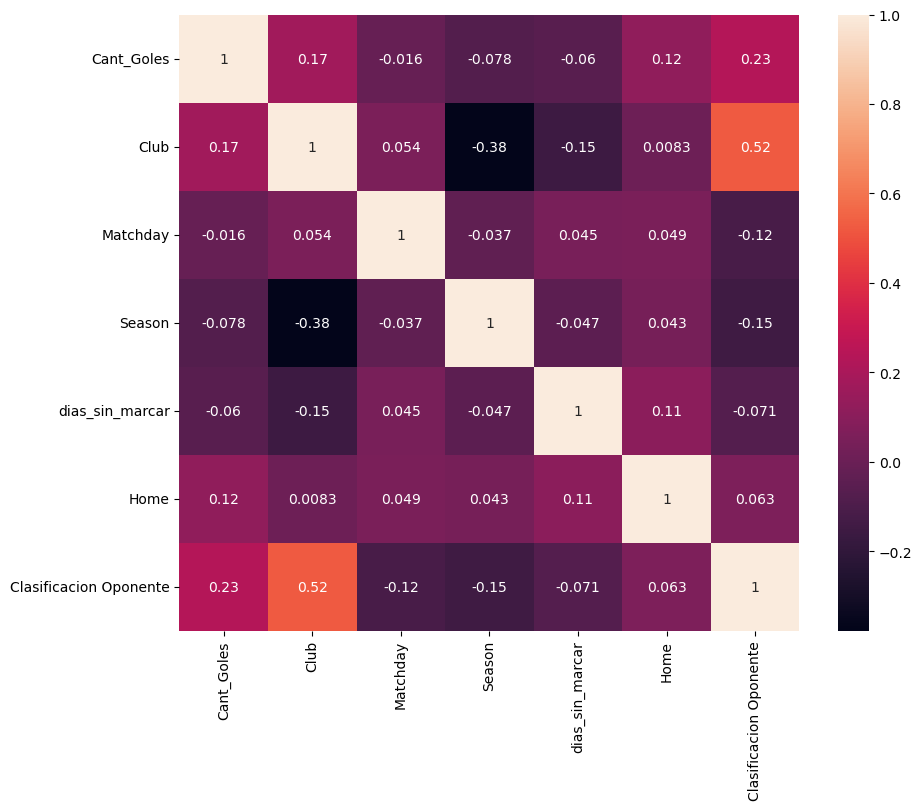

In [79]:
# 29. Graficamos matrix de correlación
data_corr = Modelado_Messi.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [81]:
# 30. Entrenamos nuestro primer modelo OLS y definimos Cant_goles como la variable obejtivo
X = Modelado_Messi.drop(columns = "Cant_Goles")
y = Modelado_Messi.Cant_Goles

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(594, 6)

In [87]:
X_test.shape

(149, 6)

In [89]:
y_train.shape

(594,)

In [91]:
y_test.shape

(149,)

In [95]:
# 31. Resultados del primer modelo OLS
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Cant_Goles   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     9.686
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           2.79e-10
Time:                        19:33:38   Log-Likelihood:                -908.72
No. Observations:                 743   AIC:                             1831.
Df Residuals:                     736   BIC:                             1864.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [97]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.08


In [99]:
predictions=lm.predict(X_test)
predictions

array([1.82640857, 1.45750996, 1.62163818, 1.86393229, 1.88973317,
       1.89788484, 2.0390242 , 1.58424999, 2.02594021, 1.32000019,
       1.84442932, 2.02539478, 1.84940561, 1.87802561, 1.335391  ,
       1.98236017, 2.05305385, 2.05984436, 2.02259093, 1.64611922,
       2.06850833, 1.89109433, 1.70976178, 2.02906275, 2.05939573,
       2.04088239, 2.05491204, 1.49865324, 1.88294266, 1.87259625,
       1.89159136, 2.0267228 , 1.84902994, 1.89652368, 2.01280782,
       1.83004341, 2.03092094, 1.85447457, 1.89295251, 1.83496046,
       2.10108445, 1.91691977, 1.83321435, 2.06573761, 1.97380828,
       1.83896239, 1.81277915, 2.03409188, 1.91825637, 2.03766305,
       1.91558246, 2.04526928, 1.84588729, 2.04858543, 2.03766305,
       1.98913541, 2.0267228 , 1.54175152, 1.8339664 , 1.88480085,
       0.94863096, 2.05984436, 2.06849306, 2.01322332, 2.05305385,
       1.7818676 , 2.02273614, 2.04812153, 1.85759041, 2.04676037,
       1.86376324, 2.01046787, 2.04496586, 1.85987936, 2.05622

In [101]:
mse=mean_squared_error(y_test, predictions)
print(mse)

rmse=math.sqrt(mse)
print(rmse)

r2=r2_score(y_test, predictions)
print(r2)

0.7082373639413305
0.8415683952842636
0.04982005578550386


In [103]:
# 32. Comparamos otros modelos
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()
model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.30048586512718384, 'Linear Regression': 0.04414159219944828, 'KNN': 0.03387561000558985}


In [105]:
# 33. Como la mayor puntuacion fue del arbol de regrseion, probaremos un random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros como `n_estimators`
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [107]:
y_pred = rf.predict(X_test)
print("R2 value is = ", round(r2_score(y_test, y_pred), 2))
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 2))

R2 value is =  0.51
Mean Squared Error (MSE):  0.36


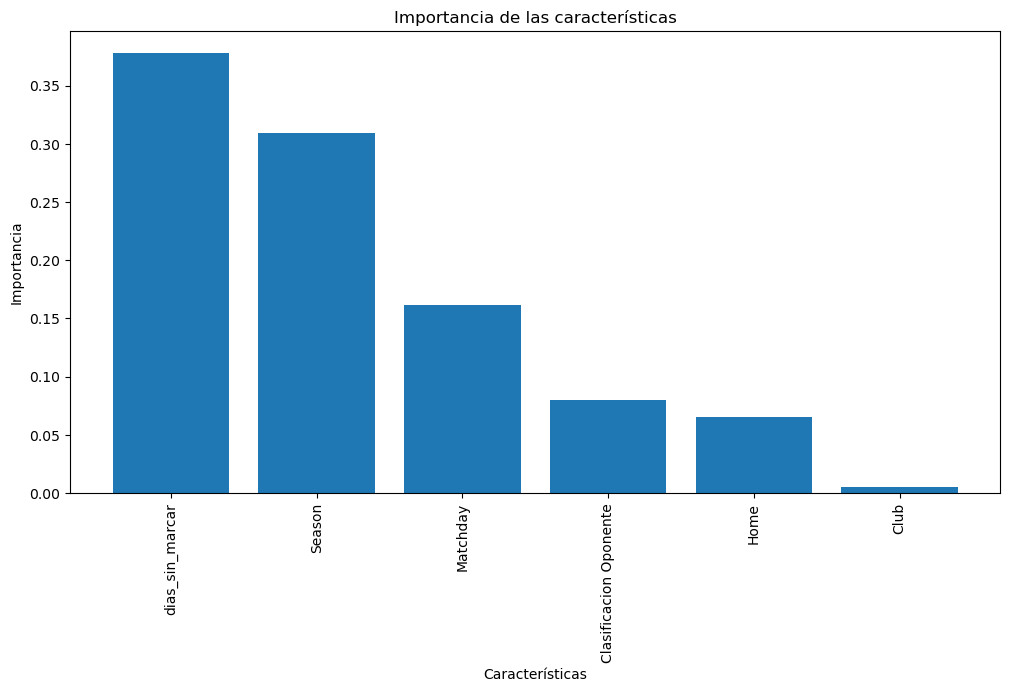

In [109]:
# 34. Graficamos la importancia de las características
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title('Importancia de las características')
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

Si bien el score mejoró muchisimo podemos ver que es dificil de predecir la cantidad de goles que realizará Messi en un partido, por lo que hemos decidido cambiar el enfoque a si hara 1 o más goles.

In [112]:
# 35. Definimos otra tabla para cambiar la variable objetivo
Modelado_Messi2 = Modelado_Messi
Modelado_Messi2['Cant_Goles'] = np.where(Modelado_Messi2['Cant_Goles'] == 1, 0, 1)
Modelado_Messi2= Modelado_Messi2.rename(columns={'Cant_Goles': 'Mas_1_gol'})
Modelado_Messi2

,Mas_1_gol,Club,Matchday,Season,dias_sin_marcar,Home,Clasificacion Oponente
1,0,1,1,2004,13,1,1
2,0,1,1,2004,43,0,1
3,0,1,1,2004,28,0,2
4,0,1,1,2004,21,1,1
5,0,1,2,2004,125,1,2
...,...,...,...,...,...,...,...
739,1,3,2,2024,4,0,2
740,1,3,2,2024,17,1,3
741,1,3,2,2024,17,1,3
742,1,3,2,2024,17,1,3


In [114]:
# 36. Definimos la variable objetivo
X1 = Modelado_Messi2.drop(columns = "Mas_1_gol")
y1 = Modelado_Messi2.Mas_1_gol

In [116]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [122]:
# 37. Comparamos modelos
model3 = DecisionTreeClassifier(random_state=42)
model4 = LogisticRegression(random_state=42)
model5 = KNeighborsClassifier()

model_pipeline = [model3, model4, model5]
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X1_train, y1_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'DecisionTreeClassifier': 0.729180790960452, 'LogisticRegression': 0.6398305084745763, 'KNeighborsClassifier': 0.6414971751412429}


C:\Users\Flor Guindo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Flor Guindo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [126]:
# 38. Nuevamente nos inclinamos por un RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)
y1_pred = rf_model.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy:.2f}")
# 38.1 Vemos la matriz de confusión
print("\nConfusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

Accuracy: 0.74

Confusion Matrix:
[[27 29]
 [ 9 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59        56
           1       0.74      0.90      0.82        93

    accuracy                           0.74       149
   macro avg       0.75      0.69      0.70       149
weighted avg       0.75      0.74      0.73       149



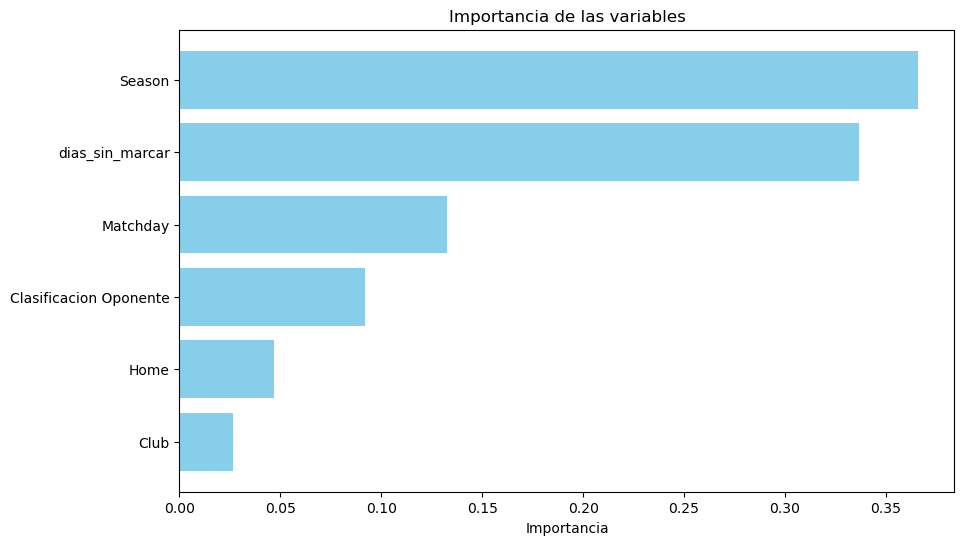

In [128]:
# 39. Visualizamos la importancia de las características en el modelo
importances1 = rf_model.feature_importances_
feature_names1 = X1_train.columns
importances_df1 = pd.DataFrame({'Feature': feature_names1, 'Importance': importances1})
importances_df1 = importances_df1.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importances_df1['Feature'], importances_df1['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir eje para mostrar de mayor a menor
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.show()